<a href="https://colab.research.google.com/github/hosseindamavandi/nma-allen-visual-behavior-2p/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os, requests, json, textwrap, itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:
plt.rcParams['figure.dpi'] = 120
pd.options.display.max_rows = 20
pd.options.display.float_format = "{:.3f}".format

In [ ]:
fname = "allen_visual_behavior_2p_change_detection_familiar_novel_image_sets.parquet"
url   = "https://ndownloader.figshare.com/files/28470255"

if not Path(fname).exists():
    print("downloading …")
    r = requests.get(url, timeout=60)
    r.raise_for_status()
    with open(fname, "wb") as f: f.write(r.content)
else:
    print("file already present")

file already present


In [ ]:
df = pd.read_parquet(fname)
print(f"{df.shape[0]:,} stimulus-by-cell rows  ×  {df.shape[1]} columns")

display(df.head())

147,695 stimulus-by-cell rows  ×  31 columns


,stimulus_presentations_id,cell_specimen_id,trace,trace_timestamps,mean_response,baseline_response,image_name,image_index,is_change,omitted,...,ophys_session_id,ophys_container_id,behavior_session_id,full_genotype,reporter_line,driver_line,indicator,sex,age_in_days,exposure_level
85,5,1086496689,"[0.06366926431655884, 0.002476318972185254, -0...","[-1.228133913303992, -1.1958145997959921, -1.1...",0.006,-0.084,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.000,familiar
86,5,1086501573,"[0.0637083426117897, 0.0919334813952446, -0.09...","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.019,-0.026,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.000,familiar
87,5,1086500533,"[0.0223990511149168, 0.22551870346069336, 0.11...","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.041,-0.033,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.000,familiar
88,5,1086497438,"[0.01795899122953415, 0.15271763503551483, 0.0...","[-1.228133913303992, -1.1958145997959921, -1.1...",0.040,-0.027,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.000,familiar
89,5,1086497908,"[0.059766266494989395, 0.03602207452058792, 0....","[-1.228133913303992, -1.1958145997959921, -1.1...",-0.007,-0.039,im075,2,True,False,...,994199725,991913453,994210659,Sst-IRES-Cre/wt;Ai148(TIT2L-GC6f-ICL-tTA2)/wt,Ai148(TIT2L-GC6f-ICL-tTA2),[Sst-IRES-Cre],GCaMP6f,M,196.000,familiar


In [ ]:
# neuron classes
CELL_CLASS = {
    "Slc17a7-IRES2-Cre" : "Excitatory",
    "Vip-IRES-Cre"      : "VIP",
    "Sst-IRES-Cre"      : "SST",
}

# visual areas (V1 vs LM are all we need, but others are present)
AREA = {
    "VISp" : "V1",

    # extra areas - ignore for now
    "VISl" : "LM",
    "VISal": "AL",
    "VISpm": "PM",
    "VISam": "AM"
}


NOVEL = {
    "OPHYS_3_images_B": False,
    "OPHYS_4_images_A": True
}
# familiar vs novel session flag
# def session_novel(series):
#     """True if session_type starts with OPHYS_4/5/6 (novel image set)."""
#     return series.str.startswith(("OPHYS_4", "OPHYS_5", "OPHYS_6"))

In [ ]:
# apply mappings
df["cell_class"]  = df["cre_line"].map(CELL_CLASS)
df["area"]        = df["targeted_structure"].map(AREA)
df["is_novel"]        = df["session_type"].map(NOVEL)

# df["is_novel"]    = session_novel(df["session_type"])

# sanity check
display(df[["cre_line","cell_class","targeted_structure","area","session_type","is_novel"]]
          .sample(10))

# display(df.sample(10))

,cre_line,cell_class,targeted_structure,area,session_type,is_novel
1483166,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_4_images_A,True
339855,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_3_images_B,False
124888,Sst-IRES-Cre,SST,VISp,V1,OPHYS_3_images_B,False
1353616,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_3_images_B,False
293983,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_3_images_B,False
1608321,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_3_images_B,False
136752,Sst-IRES-Cre,SST,VISp,V1,OPHYS_3_images_B,False
329669,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_3_images_B,False
918542,Sst-IRES-Cre,SST,VISp,V1,OPHYS_3_images_B,False
1389325,Vip-IRES-Cre,VIP,VISp,V1,OPHYS_4_images_A,True


In [ ]:
# cells per class × area
cells = (
    df[["cell_specimen_id", "cell_class", "area"]]
    .drop_duplicates()
    .groupby(["area", "cell_class"])
    .agg(n_cells=("cell_specimen_id", "nunique"))
    .reset_index()
)
display(cells)

,area,cell_class,n_cells
0,V1,SST,101
1,V1,VIP,122


In [ ]:
events = (df.groupby(["session_type", "is_novel", "omitted"])
          .size()
          .rename("n_trials")
          .reset_index())
display(events.head(10))

,session_type,is_novel,omitted,n_trials
0,OPHYS_3_images_B,False,False,53501
1,OPHYS_3_images_B,False,True,39851
2,OPHYS_4_images_A,True,False,32461
3,OPHYS_4_images_A,True,True,21882


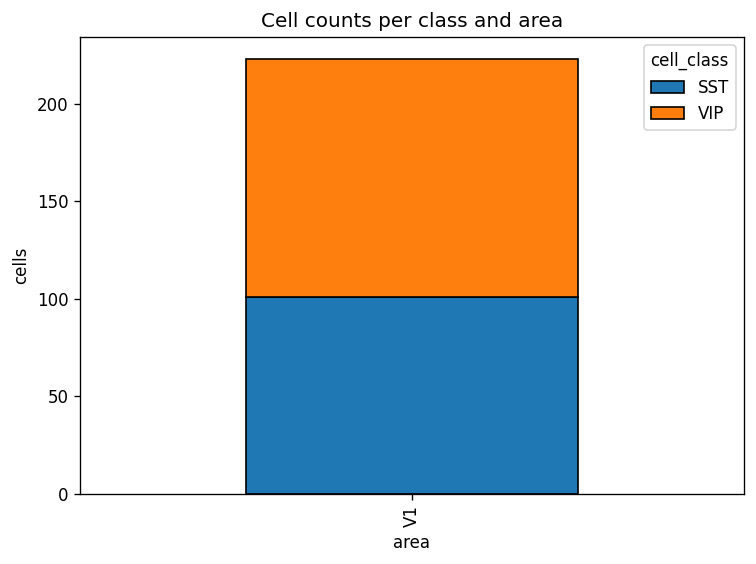

In [ ]:
pivot = cells.pivot(index="area", columns="cell_class", values="n_cells").fillna(0)
pivot.plot(kind="bar", stacked=True, edgecolor="k", title="Cell counts per class and area")
plt.ylabel("cells")
plt.tight_layout()

147,695 stimulus-rows from V1  (223 unique cells)


,cell_specimen_id,cell_class,n_cells
0,1086489847,VIP,1
1,1086489860,VIP,1
2,1086489882,VIP,1
3,1086489891,VIP,1
4,1086489901,VIP,1
...,...,...,...
218,1086668307,SST,1
219,1086668331,SST,1
220,1086668399,SST,1
221,1086668409,SST,1


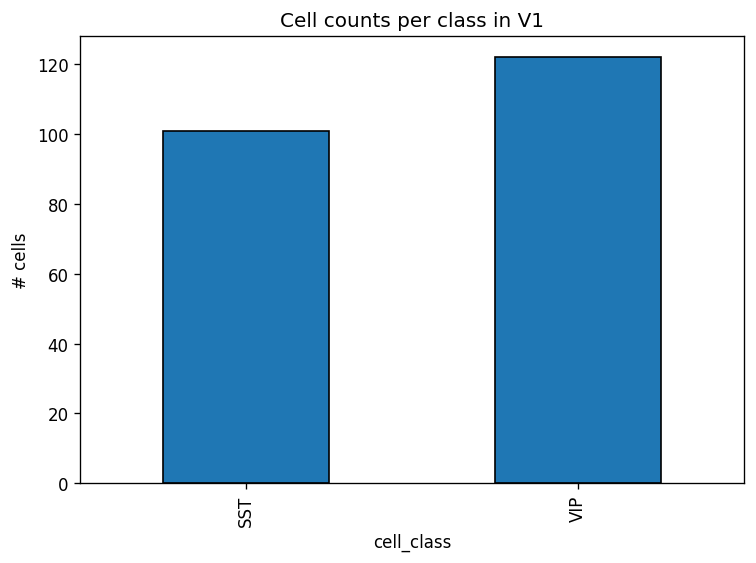

In [ ]:
v1 = df.query("targeted_structure == 'VISp'").copy()
print(f"{v1.shape[0]:,} stimulus-rows from V1  "
      f"({v1['cell_specimen_id'].nunique():,} unique cells)")

# quick counts per cell class
v1_cells = (
    v1[["cell_specimen_id", "cell_class"]]
    .drop_duplicates()
    .value_counts()
    .rename("n_cells")
    .reset_index()
)
display(v1_cells)

v1_cells.groupby("cell_class")["n_cells"].sum().plot(kind="bar", edgecolor="k", legend=False)
plt.title("Cell counts per class in V1")
plt.ylabel("# cells")
plt.tight_layout()

Text(0.5, 1.05, 'Per-trial ΔF/F means in V1\nblue = familiar, red = novel')

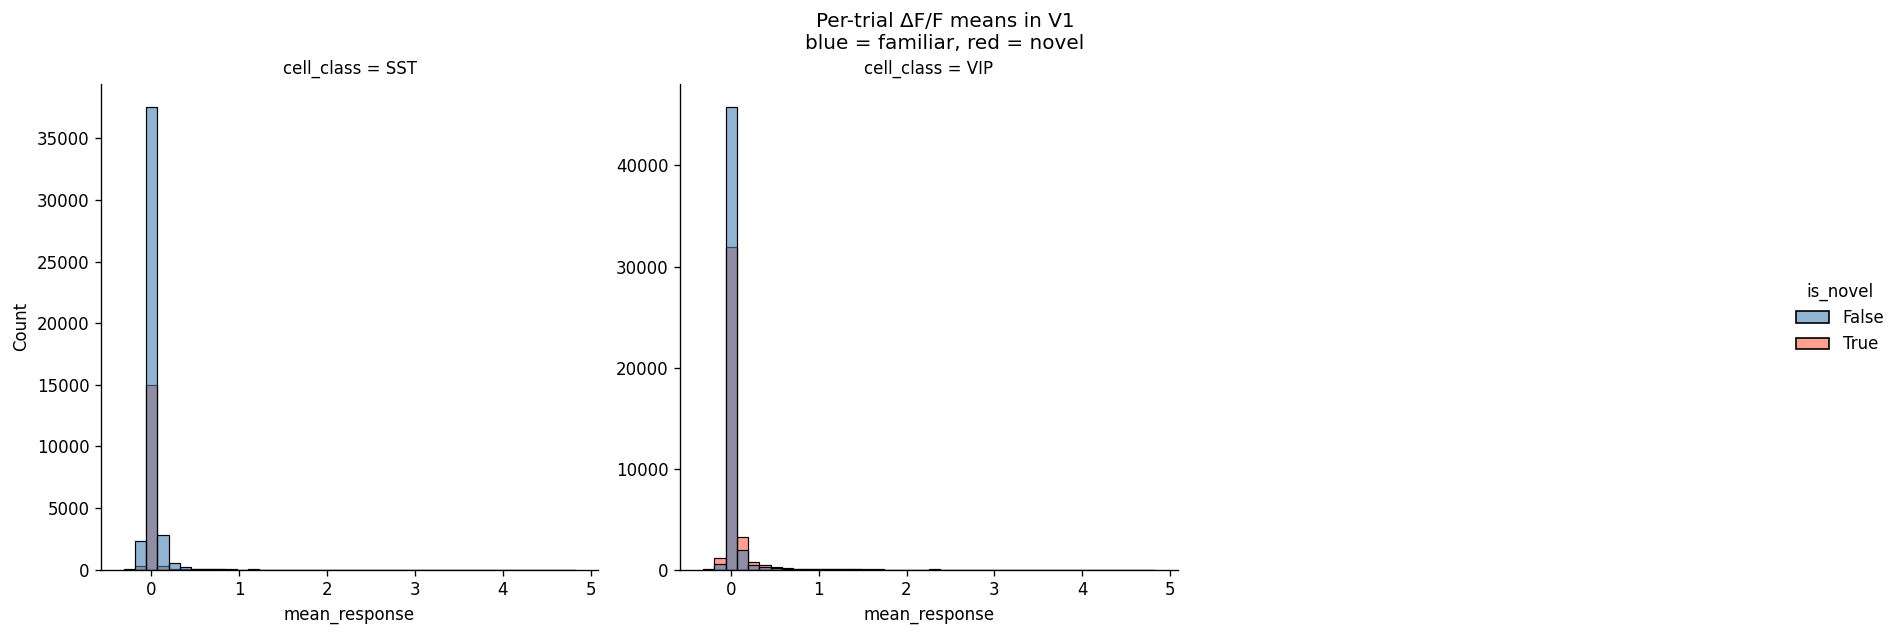

In [ ]:
# Histogram of mean_response by cell class & condition
import seaborn as sns
g = sns.displot(
        data=v1, x="mean_response",
        col="cell_class", col_wrap=3,
        hue="is_novel", palette=["steelblue","tomato"],
        bins=40, alpha=.6, facet_kws=dict(sharex=False, sharey=False))
g.fig.suptitle("Per-trial ΔF/F means in V1\nblue = familiar, red = novel", y=1.05)

In [ ]:
# Aggregate metrics for every cell
v1 = v1.assign(condition = np.select(
        [v1["omitted"],
         v1["is_novel"] & ~v1["omitted"],
         ~v1["is_novel"] & ~v1["omitted"]],
        ["omission", "novel", "familiar"],
        default="unknown"
    ))

metrics = (
    v1.groupby(["cell_specimen_id", "cell_class", "condition"])
       .agg(mean_resp=("mean_response","mean"), n_trials=("mean_response","size"))
       .reset_index()
       .pivot(index=["cell_specimen_id","cell_class"],
              columns="condition", values="mean_resp")
       .reset_index()
)

metrics["novelty_idx"]  = (metrics["novel"] - metrics["familiar"]) / \
                          (metrics["novel"] + metrics["familiar"])
metrics["omission_idx"] =  metrics["omission"] - metrics[["novel","familiar"]].mean(axis=1)

display(metrics.head())

condition,cell_specimen_id,cell_class,familiar,novel,omission,novelty_idx,omission_idx
0,1086489847,VIP,0.013,0.016,0.005,0.100,-0.010
1,1086489860,VIP,0.009,0.018,0.001,0.339,-0.012
2,1086489882,VIP,NaN,0.047,0.003,NaN,-0.044
3,1086489891,VIP,0.011,0.022,0.001,0.312,-0.016
4,1086489901,VIP,0.005,NaN,0.006,NaN,0.001


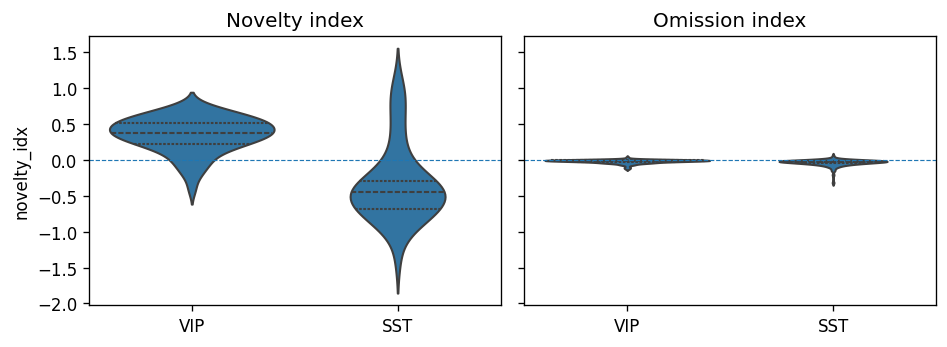

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(8,3), sharey=True)

sns.violinplot(data=metrics, x="cell_class", y="novelty_idx",
               inner="quartile", ax=axs[0])
axs[0].set_title("Novelty index"); axs[0].axhline(0, ls="--", lw=.7)

sns.violinplot(data=metrics, x="cell_class", y="omission_idx",
               inner="quartile", ax=axs[1])
axs[1].set_title("Omission index"); axs[1].axhline(0, ls="--", lw=.7)

for ax in axs: ax.set_xlabel("")
plt.tight_layout()

No cells found for Excitatory — skipping.
No novel trials for cell 1086491066 — skipping novel.
No novel trials for cell 1086502471 — skipping novel.


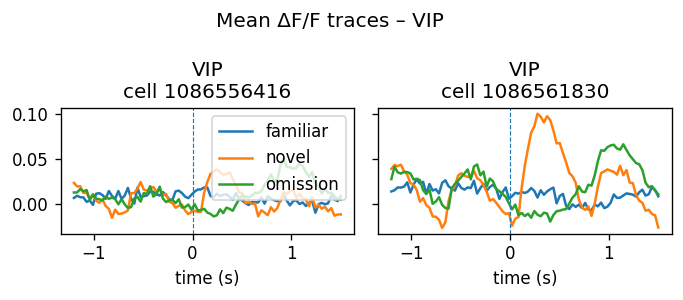

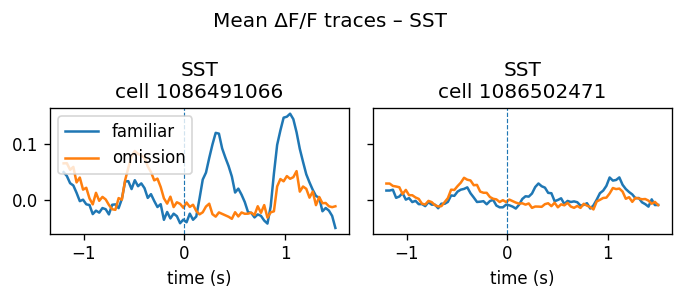

In [ ]:
for c in ["Excitatory", "VIP", "SST"]:
    subset = metrics.query("cell_class == @c")
    if subset.empty:
        print(f"No cells found for {c} — skipping.")
        continue

    n_samples = min(SAMPLES_PER_CLASS, len(subset))
    sample_ids = subset.sample(n_samples, random_state=0)["cell_specimen_id"]

    fig, axs = plt.subplots(1, n_samples, figsize=(3 * n_samples, 2.5), sharey=True)
    if n_samples == 1:
        axs = [axs]

    for ax, cid in zip(axs, sample_ids):
        d = v1[v1["cell_specimen_id"] == cid]
        for lab, colr in [("familiar", "steelblue"),
                           ("novel", "tomato"),
                           ("omission", "gray")]:
            condition_rows = d.query("condition == @lab")["trace"]
            if condition_rows.empty:
                print(f"No {lab} trials for cell {cid} — skipping {lab}.")
                continue
            traces = np.stack(condition_rows)
            ax.plot(TIME, traces.mean(0), label=lab, lw=1.5)
        ax.set_title(f"{c}\ncell {cid}")
        ax.axvline(0, ls="--", lw=.7)
        ax.set_xlabel("time (s)")

    axs[0].legend()
    plt.suptitle(f"Mean ΔF/F traces – {c}")
    plt.tight_layout()